<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:green"><center>Predicción de secuencia de valores futuros de una acción</center></span>

**<center>Aplicaciones de Redes LSTM</center>**

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co
6. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

7. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

8. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

9. Dairo Moreno, damoralesj@unal.edu.co
10. Joan Castro, jocastroc@unal.edu.co
11. Bryan Riveros, briveros@unal.edu.co
12. Rosmer Vargas, rovargasc@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Referencias</span>

1. [Introducción a Redes LSTM](Intro_LSTM.ipynb)
1. [Time Series Forecasting with LSTMs using TensorFlow 2 and Keras in Python](https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651/)
1. [Dive into Deep Learnig](https://d2l.ai/)
1. [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
1. Ralf C. Staudemeyer and Eric Rothstein Morris,[*Understanding LSTM a tutorial into Long Short-Term Memory Recurrent Neural Networks*](https://arxiv.org/pdf/1909.09586.pdf), arxiv, September 2019
1. Karpathy, [*The Unreasonable Effectiveness of Recurrent Neural Networks*](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
1. Anton Lucanus, [Making Automation More Efficient by Learning from Historical Trade Data](https://datafloq.com/read/making-automation-more-efficient-by-learning-from-/7444), 8:43 AM, January 7, 2020
1. https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
1. https://www.youtube.com/watch?v=2BrpKpWwT2A&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=1
1. https://towardsdatascience.com/using-lstms-for-stock-market-predictions-tensorflow-9e83999d4653
1. https://github.com/llSourcell/Reinforcement_Learning_for_Stock_Prediction/blob/master/README.md

## <span style="color:#4361EE">Contenido</span>

* [Introducción](#Introducción)
* [Importar las librería requeridas](#Importar-las-librería-requeridas)
* [Funciones-para-graficar-predicciones](#Funciones-para-graficar-predicciones)
* [Lectura de los datos](#Lectura-de-los-datos)
* [Extrae datos para la serie que se desea predecir-close](#Extrae-datos-para-la-serie-que-se-desea-predecir-close)
* [Visualización de la serie precio al cierre](#Visualización-de-la-serie-precio-al-cierre)
* [Preparación de los datos para el entrenamiento](#Preparación-de-los-datos-para-el-entrenamiento)
* [Crea el modelo LSTM](#Crea-el-modelo-LSTM)
* [Lee modelo preentrenado a un día](#Lee-modelo-preentrenado-a-un-día)
* [Predicciones](#Predicciones)
* [Guarda el modelo entrenado](#Guarda-el-modelo-entrenado)
* [Intervalos de confianza. TO DO](#Intervalos-de-confianza.-TO-DO)
* [Python: How to Get Live Market Data (Less Than 0.1-Second Lag](https://towardsdatascience.com/python-how-to-get-live-market-data-less-than-0-1-second-lag-c85ee280ed93)

## <span style="color:#4361EE">Importar las librería requeridas</span>

In [51]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# importa objetos de keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional
print("Versión de Tensorflow: ", tf.__version__)

# optimizador
from tensorflow.keras.optimizers import Adam

# Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

Versión de Tensorflow:  2.9.2


## <span style="color:#4361EE">Lectura de  los datos</span>

### <span style="color:black">Yahoo Finance API</span>

Como las acciones van cambiando de valor todos los días, será mejor utilizar una API que nos dé información actualizada de la bolsa.

Para esto, usaremos la API de Yahoo Finance de la bolsa de valores.

In [52]:
#!pip install yfinance
import yfinance as yf

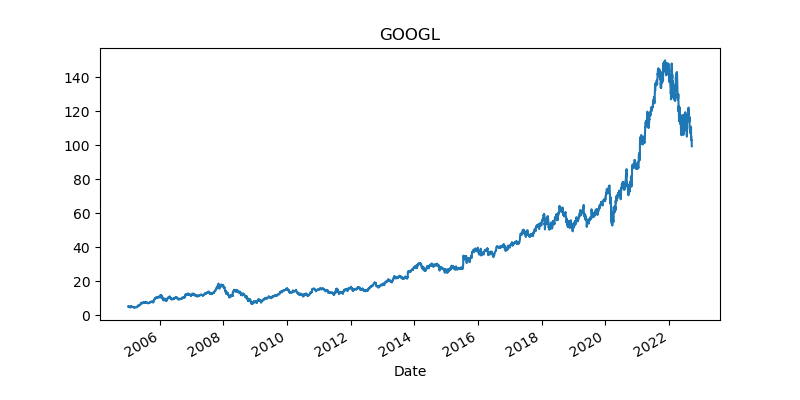

In [53]:
# Define Stock
stock = 'GOOGL'

# Get data
data = yf.download(tickers=stock, period='max', interval='1d', progress=False, start='2005-01-01')

#Print data
#display(data)

#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
data['Close'].plot(title=stock);

In [54]:
# looking at the first five rows of the data
print(f'\n Forma de los datos: {data.shape}\n')
data


 Forma de los datos: (4461, 6)



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,4.939940,5.096096,4.891391,5.072823,5.072823,633134232
2005-01-04,5.040040,5.078328,4.841842,4.867367,4.867367,549685764
2005-01-05,4.841091,4.927427,4.810561,4.842593,4.842593,329134536
2005-01-06,4.881882,4.902402,4.697698,4.718468,4.718468,415068516
2005-01-07,4.770771,4.861111,4.724224,4.851101,4.851101,386129484
...,...,...,...,...,...,...
2022-09-15,104.029999,105.269997,102.349998,102.910004,102.910004,34188300
2022-09-16,102.070000,103.129997,100.940002,102.800003,102.800003,42780300
2022-09-19,101.750000,103.330002,101.550003,103.070000,103.070000,23036800


In [55]:
data_close = data[['Close']]
data_close.head()

,Close
Date,
2005-01-03,5.072823
2005-01-04,4.867367
2005-01-05,4.842593
2005-01-06,4.718468
2005-01-07,4.851101


Note cómo la API ya devuelve la información de manera amena, pero no tiene por qué ser así.

## <span style="color:#4361EE">Visualización de la serie precio al cierre</span>

In [56]:
# plot
len_data = len(data_close)
len_train = int(len_data*0.9) # 90%  = 9478 -> Depende de la fecha y acción elegida 
len_test = len_data - len_train # 20% = 1054 -> Depende de la fecha y acción elegida 
print (len_data, '=', len_train, '+',len_test)

4461 = 4014 + 447


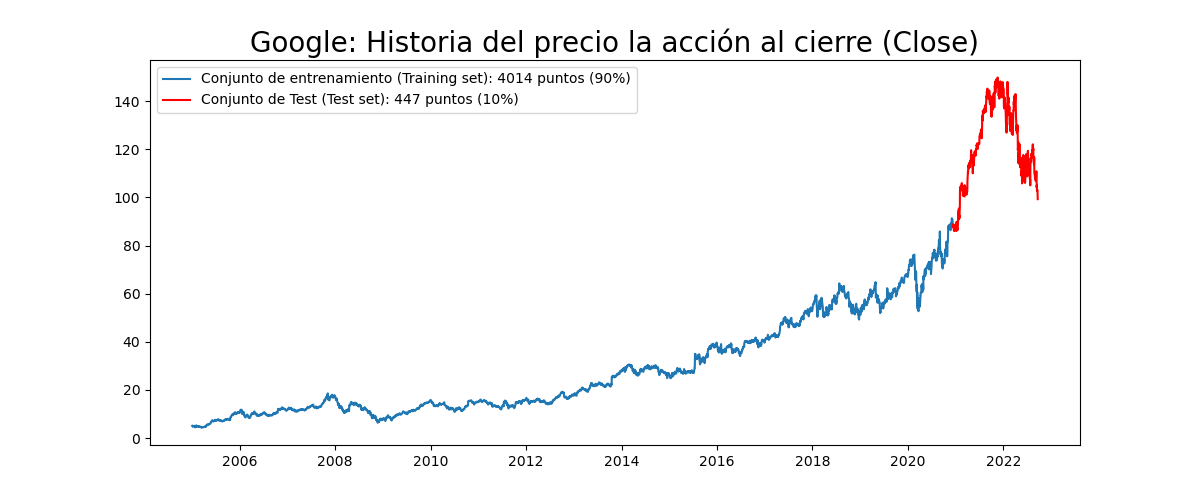

In [57]:
plt.figure(figsize=(12,5))
plt.plot(data_close[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (90%)'.format(len_train))
plt.plot(data_close['Close'][len_train:], label='Conjunto de Test (Test set): {} puntos (10%)'.format(len_test), color='r') 
plt.title("Google: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()

## <span style="color:#4361EE">Preparación de los datos para el entrenamiento de la red LSTM</span>

Para evitar problemas con las tendencias y para mejorar la estimación (entrenamiento) los datos se van a transformar a la escala $[0,1]$. Para las predicciones se utiliza la transformación inversa.

### Primero extrae los valores y se crea el  objeto MinMaxScaler

In [58]:
#creating train and test sets
dataset = data_close.values

# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0,1))
# Scaled data
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)

In [59]:
# Check ok
print(dataset.shape)
# Check ok in scaler
print(f'\nMin: {dataset.min()}, Max: {dataset.max()}')

(4461,)

Min: 0.0, Max: 1.0


### Crea datos de entrenamiento 

 La red LSTM tendrá como entrada "**time_step**" datos consecutivos, y como salida **varios datos** (la predicción a
 partir de esos "time_step" datos se hace en toda una ventana de tiempo). 
 
 Se conformará de esta forma el set de entrenamiento

1. Número de datos consecutivos para entrenamiento: time_step = 60. 
2. Días a predecir: days = 10 en línea

### Función para crear los datos entrenamiento

In [60]:
def multipaso_data(dataset, target, start_index, end_index, history_size,
                      target_size,  single_step=False):
    ''' dataset: conjunto de datos para las secuencias de entrada
        target:  conjunto de datos para las secuencias de salida
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la venytana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
        single_step: Predecir solamente un valor futuro (=True),
                     o predecir todos los valores hasta target_size(=False)
    '''  
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)

    for i in range(start_index, end_index-target_size+1):
        indices = range(i-history_size, i)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size-1])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

Se coloca una semilla para garantizar replicabilidad

In [61]:
tf.random.set_seed(100)

In [63]:
#
# hiperparámetros para crear las secuencias
#
# tamaño de pasos a futuro
future_target = 10

# tamaño secuencias de entrada
past_history = 60 

TRAIN_SPLIT = len_train #2415: nuḿer0 de datos entreno

# Crea los datos
X_train, y_train = multipaso_data(dataset, dataset, 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target)
X_test, y_test = multipaso_data(dataset, dataset, TRAIN_SPLIT-past_history-future_target+1,
                                                 None, past_history,
                                                 future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4014
(3945, 60)
(3945, 10)
(447, 60)
(447, 10)


In [71]:
# Visualize
pd.set_option('display.max_columns',100)
train_df = pd.DataFrame(X_train, columns=[f'h_{i}' for i in range(past_history)])
pd.concat((train_df,pd.DataFrame(y_train, columns=[f'target_{i}' for i in range(future_target)])),axis=1)

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,h_24,h_25,h_26,h_27,h_28,h_29,h_30,h_31,h_32,h_33,h_34,h_35,h_36,h_37,h_38,h_39,h_40,h_41,h_42,h_43,h_44,h_45,h_46,h_47,h_48,h_49,h_50,h_51,h_52,h_53,h_54,h_55,h_56,h_57,h_58,h_59,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9
0,0.004769,0.003357,0.003186,0.002333,0.003245,0.003453,0.003191,0.003508,0.003499,0.004298,0.004974,0.003838,0.003257,0.002286,0.000986,0.000366,0.002452,0.002252,0.002641,0.003549,0.002909,0.005328,0.006171,0.005053,0.003620,0.004069,0.002854,0.002235,0.002135,0.003097,0.003482,0.004029,0.003941,0.003950,0.002818,0.003262,0.002391,0.001872,0.002237,0.001904,0.001753,0.002068,0.001877,0.002378,0.001757,0.001094,0.000858,0.000483,0.000000,0.000623,0.000105,0.000740,0.000869,0.001013,0.000621,0.000686,0.000733,0.001106,0.000788,0.000939,0.000950,0.000869,0.001772,0.002336,0.002448,0.003229,0.002935,0.003138,0.003264,0.003086
1,0.003357,0.003186,0.002333,0.003245,0.003453,0.003191,0.003508,0.003499,0.004298,0.004974,0.003838,0.003257,0.002286,0.000986,0.000366,0.002452,0.002252,0.002641,0.003549,0.002909,0.005328,0.006171,0.005053,0.003620,0.004069,0.002854,0.002235,0.002135,0.003097,0.003482,0.004029,0.003941,0.003950,0.002818,0.003262,0.002391,0.001872,0.002237,0.001904,0.001753,0.002068,0.001877,0.002378,0.001757,0.001094,0.000858,0.000483,0.000000,0.000623,0.000105,0.000740,0.000869,0.001013,0.000621,0.000686,0.000733,0.001106,0.000788,0.000939,0.000950,0.000869,0.001772,0.002336,0.002448,0.003229,0.002935,0.003138,0.003264,0.003086,0.002832
2,0.003186,0.002333,0.003245,0.003453,0.003191,0.003508,0.003499,0.004298,0.004974,0.003838,0.003257,0.002286,0.000986,0.000366,0.002452,0.002252,0.002641,0.003549,0.002909,0.005328,0.006171,0.005053,0.003620,0.004069,0.002854,0.002235,0.002135,0.003097,0.003482,0.004029,0.003941,0.003950,0.002818,0.003262,0.002391,0.001872,0.002237,0.001904,0.001753,0.002068,0.001877,0.002378,0.001757,0.001094,0.000858,0.000483,0.000000,0.000623,0.000105,0.000740,0.000869,0.001013,0.000621,0.000686,0.000733,0.001106,0.000788,0.000939,0.000950,0.000869,0.001772,0.002336,0.002448,0.003229,0.002935,0.003138,0.003264,0.003086,0.002832,0.001722
3,0.002333,0.003245,0.003453,0.003191,0.003508,0.003499,0.004298,0.004974,0.003838,0.003257,0.002286,0.000986,0.000366,0.002452,0.002252,0.002641,0.003549,0.002909,0.005328,0.006171,0.005053,0.003620,0.004069,0.002854,0.002235,0.002135,0.003097,0.003482,0.004029,0.003941,0.003950,0.002818,0.003262,0.002391,0.001872,0.002237,0.001904,0.001753,0.002068,0.001877,0.002378,0.001757,0.001094,0.000858,0.000483,0.000000,0.000623,0.000105,0.000740,0.000869,0.001013,0.000621,0.000686,0.000733,0.001106,0.000788,0.000939,0.000950,0.000869,0.001772,0.002336,0.002448,0.003229,0.002935,0.003138,0.003264,0.003086,0.002832,0.001722,0.002061
4,0.003245,0.003453,0.003191,0.003508,0.003499,0.004298,0.004974,0.003838,0.003257,0.002286,0.000986,0.000366,0.002452,0.002252,0.002641,0.003549,0.002909,0.005328,0.006171,0.005053,0.003620,0.004069,0.002854,0.002235,0.002135,0.003097,0.003482,0.004029,0.003941,0.003950,0.002818,0.003262,0.002391,0.001872,0.002237,0.001904,0.001753,0.002068,0.001877,0.002378,0.001757,0.001094,0.000858,0.000483,0.000000,0.000623,0.000105,0.000740,0.000869,0.001013,0.000621,0.000686,0.000733,0.001106,0.000788,0.000939,0.000950,0.000869,0.001772,0.002336,0.002448,0.003229,0.002935,0.003138,0.003264,0.003086,0.002832,0.001722,0.002061,0.002823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,0.529680,0.533430,0.530027,0.538809,0.560228,0.530020,0.513417,0.493615,0.501737,0.494457,0.490920,0.488538,0.497574,0.489658,0.481048,0.468690,0.461489,0.471691,0.454356

In [72]:
print(dataset[:70].shape)
dataset[:70]

(70,)


array([0.00476899, 0.00335652, 0.00318621, 0.00233288, 0.0032447 ,
       0.00345287, 0.00319136, 0.00350792, 0.00349932, 0.00429759,
       0.00497372, 0.00383824, 0.00325674, 0.00228643, 0.0009858 ,
       0.00036645, 0.00245159, 0.00225202, 0.00264084, 0.00354921,
       0.00290922, 0.00532812, 0.00617112, 0.00505285, 0.00361975,
       0.00406878, 0.00285416, 0.00223482, 0.00213504, 0.00309675,
       0.00348212, 0.00402921, 0.00394147, 0.00395007, 0.00281804,
       0.00326191, 0.00239138, 0.00187181, 0.00223654, 0.0019045 ,
       0.0017531 , 0.00206794, 0.00187697, 0.00237761, 0.00175655,
       0.00109418, 0.00085849, 0.00048343, 0.        , 0.00062279,
       0.00010494, 0.00073978, 0.00086881, 0.00101333, 0.00062107,
       0.00068645, 0.0007329 , 0.00110623, 0.00078795, 0.00093935,
       0.00094967, 0.00086881, 0.00177203, 0.00233632, 0.00244815,
       0.00322922, 0.00293503, 0.00313804, 0.00326363, 0.00308642])

In [73]:
test_df = pd.DataFrame(X_test, columns=[f'h_{i}' for i in range(past_history)])
pd.concat((test_df,pd.DataFrame(y_test, columns=[f'target_{i}' for i in range(future_target)])),axis=1)

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,h_24,h_25,h_26,h_27,h_28,h_29,h_30,h_31,h_32,h_33,h_34,h_35,h_36,h_37,h_38,h_39,h_40,h_41,h_42,h_43,h_44,h_45,h_46,h_47,h_48,h_49,h_50,h_51,h_52,h_53,h_54,h_55,h_56,h_57,h_58,h_59,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9
0,0.530020,0.513417,0.493615,0.501737,0.494457,0.490920,0.488538,0.497574,0.489658,0.481048,0.468690,0.461489,0.471691,0.454356,0.458986,0.464555,0.471292,0.473822,0.473678,0.481343,0.470240,0.479600,0.468666,0.471457,0.479807,0.489094,0.507704,0.508557,0.507309,0.504570,0.508773,0.495797,0.503061,0.515060,0.522166,0.531213,0.514476,0.519491,0.489215,0.505054,0.525414,0.528236,0.535571,0.570011,0.575734,0.574782,0.575363,0.567216,0.570485,0.568969,0.579089,0.579697,0.575445,0.568220,0.574383,0.566755,0.563724,0.576215,0.576294,0.584162,0.572949,0.587029,0.597207,0.596131,0.596791,0.594478,0.592518,0.581014,0.577504,0.579962
1,0.513417,0.493615,0.501737,0.494457,0.490920,0.488538,0.497574,0.489658,0.481048,0.468690,0.461489,0.471691,0.454356,0.458986,0.464555,0.471292,0.473822,0.473678,0.481343,0.470240,0.479600,0.468666,0.471457,0.479807,0.489094,0.507704,0.508557,0.507309,0.504570,0.508773,0.495797,0.503061,0.515060,0.522166,0.531213,0.514476,0.519491,0.489215,0.505054,0.525414,0.528236,0.535571,0.570011,0.575734,0.574782,0.575363,0.567216,0.570485,0.568969,0.579089,0.579697,0.575445,0.568220,0.574383,0.566755,0.563724,0.576215,0.576294,0.584162,0.572949,0.587029,0.597207,0.596131,0.596791,0.594478,0.592518,0.581014,0.577504,0.579962,0.572214
2,0.493615,0.501737,0.494457,0.490920,0.488538,0.497574,0.489658,0.481048,0.468690,0.461489,0.471691,0.454356,0.458986,0.464555,0.471292,0.473822,0.473678,0.481343,0.470240,0.479600,0.468666,0.471457,0.479807,0.489094,0.507704,0.508557,0.507309,0.504570,0.508773,0.495797,0.503061,0.515060,0.522166,0.531213,0.514476,0.519491,0.489215,0.505054,0.525414,0.528236,0.535571,0.570011,0.575734,0.574782,0.575363,0.567216,0.570485,0.568969,0.579089,0.579697,0.575445,0.568220,0.574383,0.566755,0.563724,0.576215,0.576294,0.584162,0.572949,0.587029,0.597207,0.596131,0.596791,0.594478,0.592518,0.581014,0.577504,0.579962,0.572214,0.575246
3,0.501737,0.494457,0.490920,0.488538,0.497574,0.489658,0.481048,0.468690,0.461489,0.471691,0.454356,0.458986,0.464555,0.471292,0.473822,0.473678,0.481343,0.470240,0.479600,0.468666,0.471457,0.479807,0.489094,0.507704,0.508557,0.507309,0.504570,0.508773,0.495797,0.503061,0.515060,0.522166,0.531213,0.514476,0.519491,0.489215,0.505054,0.525414,0.528236,0.535571,0.570011,0.575734,0.574782,0.575363,0.567216,0.570485,0.568969,0.579089,0.579697,0.575445,0.568220,0.574383,0.566755,0.563724,0.576215,0.576294,0.584162,0.572949,0.587029,0.597207,0.596131,0.596791,0.594478,0.592518,0.581014,0.577504,0.579962,0.572214,0.575246,0.573908
4,0.494457,0.490920,0.488538,0.497574,0.489658,0.481048,0.468690,0.461489,0.471691,0.454356,0.458986,0.464555,0.471292,0.473822,0.473678,0.481343,0.470240,0.479600,0.468666,0.471457,0.479807,0.489094,0.507704,0.508557,0.507309,0.504570,0.508773,0.495797,0.503061,0.515060,0.522166,0.531213,0.514476,0.519491,0.489215,0.505054,0.525414,0.528236,0.535571,0.570011,0.575734,0.574782,0.575363,0.567216,0.570485,0.568969,0.579089,0.579697,0.575445,0.568220,0.574383,0.566755,0.563724,0.576215,0.576294,0.584162,0.572949,0.587029,0.597207,0.596131,0.596791,0.594478,0.592518,0.581014,0.577504,0.579962,0.572214,0.575246,0.573908,0.568175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.775271,0.775577,0.759362,0.734104,0.701319,0.703539,0.724500,0.698851,0.706482,0.736734,0.736346,0.741533,0.780946,0.766223,0.739920,0.737817,0.718990,0.717440,0.748552,

In [74]:
print(dataset[-70:].shape)
dataset[-70:]

(70,)


array([0.70131867, 0.7035392 , 0.72450041, 0.69885062, 0.70648162,
       0.73673403, 0.73634564, 0.74153261, 0.78094569, 0.7662234 ,
       0.7399205 , 0.73781682, 0.71899024, 0.71744002, 0.74855178,
       0.75755084, 0.7865005 , 0.79042258, 0.76514403, 0.75375942,
       0.7354244 , 0.72864587, 0.73833928, 0.71945086, 0.75231226,
       0.75293101, 0.75595588, 0.71168238, 0.70900123, 0.69188301,
       0.74715618, 0.75513094, 0.76956795, 0.75953079, 0.76138695,
       0.78166756, 0.78242379, 0.77747395, 0.77630525, 0.77169911,
       0.79280466, 0.78689235, 0.80641673, 0.80916665, 0.8065542 ,
       0.79177349, 0.79603581, 0.77568649, 0.75526841, 0.75265602,
       0.75148732, 0.77183664, 0.72845679, 0.72213201, 0.71883215,
       0.71388231, 0.72433194, 0.71133862, 0.70418885, 0.72233825,
       0.71498224, 0.73058801, 0.7320317 , 0.68707069, 0.69174553,
       0.67737729, 0.67662106, 0.67847722, 0.66520891, 0.65242183])

## <span style="color:#4361EE">Crea el modelo LSTM</span>

Omitimos esta sección. Usaremos el modelo entrenado a un día

In [75]:
# shapes
input_shape = (X_train.shape[1], 1)
units = 50

# layers
inputs = Input(input_shape)
x = Dropout(0.0, name= 'Dropout_01')(inputs)
x = LSTM(units=units, name='LSTM_layer')(x)
#x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs)
#x = Dropout(0.4)
#x = LSTM(units=units//2, name='LSTM_layer_2')(x)
#x = Dropout(0.4)
x = Dropout(0.0, name= 'Dropout_02')(x)
outputs = Dense(future_target)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_01.summary()


Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 LSTM_layer (LSTM)           (None, 50)                10400     
                                                                 
 Dropout_02 (Dropout)        (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 10,910
Trainable params: 10,910
Non-trainable params: 0
_________________________________________________________________


###  Callbacks

In [76]:
import os
os.makedirs(f'../Checkpoints/{future_target}_dia_multi', exist_ok=True)


checkpoint_filepath = f'../Checkpoints/{future_target}_dia_multi'
checkpoint_callback = ModelCheckpoint(
 filepath=checkpoint_filepath,
 save_weights_only=False,
 monitor="val_loss",
 mode="min",
 save_best_only=True)

early_stopping_callback = EarlyStopping(
 monitor="val_loss",
 min_delta=0.005,
 patience=10,
 mode="min"
)

rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, mode='min', patience=3, min_lr=0.00001)

##  Compila

Se usará el optimizador Adam y la función de pérdida MSE

In [77]:
model_01.compile(loss='mean_squared_error',
                 optimizer=Adam(0.001))

## <span style="color:#4361EE">Entrenar Modelo de Ventana de diez días</span>

### Entrena el modelo

In [78]:
#history = model_01.fit(X_train,y_train,epochs=20,batch_size=32)
history = model_01.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False,
    callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback]
)

Epoch 1/30


2022-09-21 21:39:48.509595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-21 21:39:48.609436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


  5/111 [>.............................] - ETA: 1s - loss: 1.8507e-04  

2022-09-21 21:39:48.711638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - ETA: 0s - loss: 4.0793e-04

2022-09-21 21:39:50.672930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-21 21:39:50.709061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


111/111 [==============================] - 6s 47ms/step - loss: 4.0793e-04 - val_loss: 0.0052 - lr: 0.0010
Epoch 2/30
108/111 [============================>.] - ETA: 0s - loss: 0.0015

INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


111/111 [==============================] - 5s 42ms/step - loss: 0.0015 - val_loss: 0.0024 - lr: 0.0010
Epoch 3/30
111/111 [==============================] - 2s 15ms/step - loss: 0.0013 - val_loss: 0.0028 - lr: 0.0010
Epoch 4/30
108/111 [============================>.] - ETA: 0s - loss: 0.0012

INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


111/111 [==============================] - 5s 44ms/step - loss: 0.0012 - val_loss: 0.0017 - lr: 0.0010
Epoch 5/30
111/111 [==============================] - 2s 15ms/step - loss: 0.0010 - val_loss: 0.0021 - lr: 0.0010
Epoch 6/30
108/111 [============================>.] - ETA: 0s - loss: 7.3048e-04

INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


111/111 [==============================] - 5s 43ms/step - loss: 7.1968e-04 - val_loss: 0.0015 - lr: 0.0010
Epoch 7/30
109/111 [============================>.] - ETA: 0s - loss: 4.4870e-04

INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


111/111 [==============================] - 5s 44ms/step - loss: 4.4648e-04 - val_loss: 0.0010 - lr: 0.0010
Epoch 8/30
109/111 [============================>.] - ETA: 0s - loss: 2.3758e-04

INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


111/111 [==============================] - 5s 42ms/step - loss: 2.3828e-04 - val_loss: 6.1093e-04 - lr: 0.0010
Epoch 9/30
108/111 [============================>.] - ETA: 0s - loss: 9.1080e-05

INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


111/111 [==============================] - 5s 45ms/step - loss: 9.6370e-05 - val_loss: 5.4952e-04 - lr: 0.0010
Epoch 10/30
109/111 [============================>.] - ETA: 0s - loss: 6.3207e-05

INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


111/111 [==============================] - 5s 43ms/step - loss: 6.6986e-05 - val_loss: 5.4705e-04 - lr: 0.0010
Epoch 11/30
109/111 [============================>.] - ETA: 0s - loss: 6.2643e-05

INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


INFO:tensorflow:Assets written to: ../Checkpoints/10_dia_multi/assets


111/111 [==============================] - 5s 41ms/step - loss: 6.6380e-05 - val_loss: 5.4423e-04 - lr: 0.0010


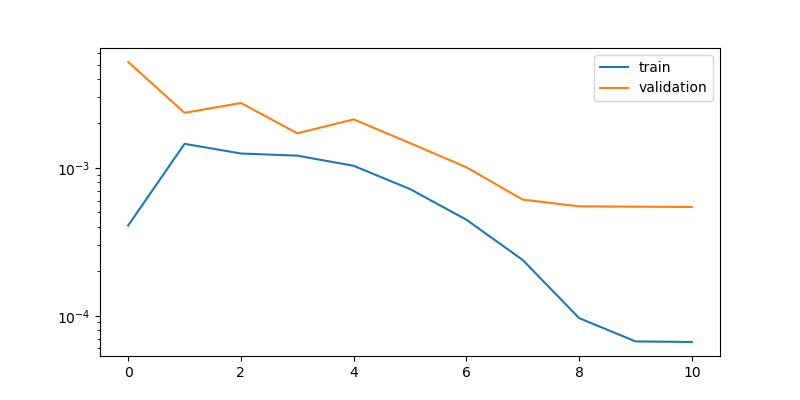

In [79]:
#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
plt.semilogy(history.history['loss'], label='train')
plt.semilogy(history.history['val_loss'], label='validation')
plt.legend();

## <span style="color:#4361EE">Predicciones</span>

### Prepara los datos de validación

In [80]:
X_test.shape

(447, 60)

### Calcula predicciones

In [81]:
# predictions
prediction = model_01.predict(X_test)
#prediction = scaler.inverse_transform(prediction)

 8/14 [================>.............] - ETA: 0s

2022-09-21 21:40:35.775241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-21 21:40:35.808385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 11ms/step


In [82]:
print(X_test.shape)
print(prediction.shape)
print(y_test.shape)

(447, 60)
(447, 10)
(447, 10)


### Prepara datos para mostrar predicciones

In [83]:
pred=0
y_train_p = X_test[pred,:]
y_test_p = y_test[pred,:]
y_pred_p = prediction[pred,:]

#print(y_train_p.shape)
#print(y_test_p.shape)
#print(y_pred_p.shape)

### Gráfica de las predicciones

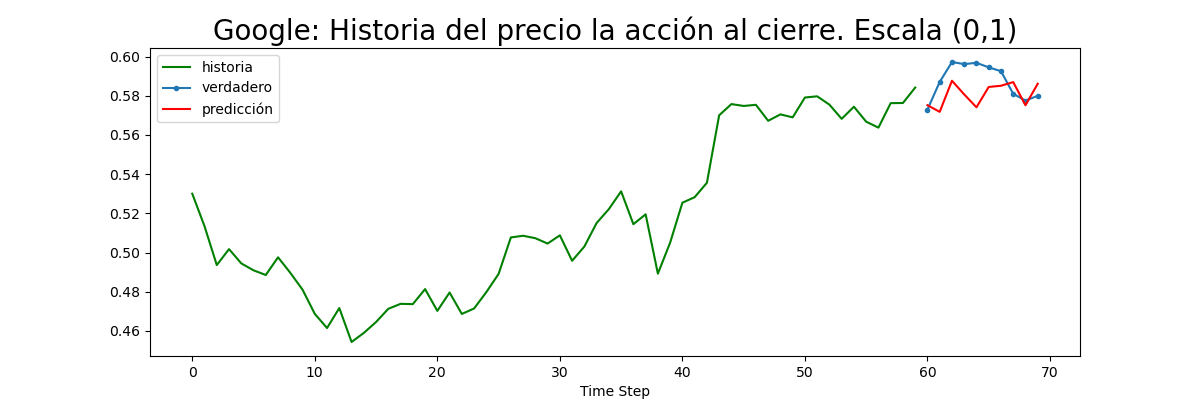

In [84]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(np.arange(0, len(y_train_p)), y_train_p, 'g', label="historia")
plt.plot(np.arange(len(y_train_p), len(y_train_p) + len(y_test_p)), y_test_p, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p), len(y_train_p) + len(y_test_p)), y_pred_p, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title(f"Google: Historia del precio la acción al cierre. Escala (0,1)", size = 20)
plt.legend()
plt.show();

## <span style="color:#4361EE">Guarda el modelo entrenado</span>

In [85]:
model_01.save(f'../Modelos/modelo_{stock}_{future_target}_dia_multiple.h5')

## <span style="color:#4361EE">Intervalos de confianza. TO DO</span>

In [86]:
print(model_01.get_config())

{'name': 'series_LSTM_model', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 60, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_2'}, 'name': 'input_2', 'inbound_nodes': []}, {'class_name': 'Dropout', 'config': {'name': 'Dropout_01', 'trainable': True, 'dtype': 'float32', 'rate': 0.0, 'noise_shape': None, 'seed': None}, 'name': 'Dropout_01', 'inbound_nodes': [[['input_2', 0, 0, {}]]]}, {'class_name': 'LSTM', 'config': {'name': 'LSTM_layer', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 50, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}, 'shared_object_id': 2}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'shared_object_id': 3}, 'bias_initializer': 

## <span style="color:#4361EE">Predicción de los siguientes diez días</span>

In [87]:
from datetime import date
hoy = data_close.index[-past_history:][-1]
print("Hoy: ", hoy)

Hoy:  2022-09-21 00:00:00


In [88]:
diez_dias = [data_close.index[-past_history:][-1]+pd.DateOffset(i) for i in range(1,future_target+1)]
print("En tres días: ", diez_dias)

En tres días:  [Timestamp('2022-09-22 00:00:00'), Timestamp('2022-09-23 00:00:00'), Timestamp('2022-09-24 00:00:00'), Timestamp('2022-09-25 00:00:00'), Timestamp('2022-09-26 00:00:00'), Timestamp('2022-09-27 00:00:00'), Timestamp('2022-09-28 00:00:00'), Timestamp('2022-09-29 00:00:00'), Timestamp('2022-09-30 00:00:00'), Timestamp('2022-10-01 00:00:00')]


In [89]:
ultima_ventana = dataset[-past_history:]

ultima_ventana_tensor = np.reshape(dataset[-past_history:], (1,past_history, 1))

# predictions
prediction1 = model_01.predict(ultima_ventana_tensor)

# Escalas originales
ultima_ventana_or = scaler.inverse_transform(ultima_ventana.reshape(-1,1))
prediction_or = scaler.inverse_transform(prediction1)[0]

1/1 [==============================] - 0s 264ms/step


2022-09-21 21:42:15.667258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-21 21:42:15.707416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


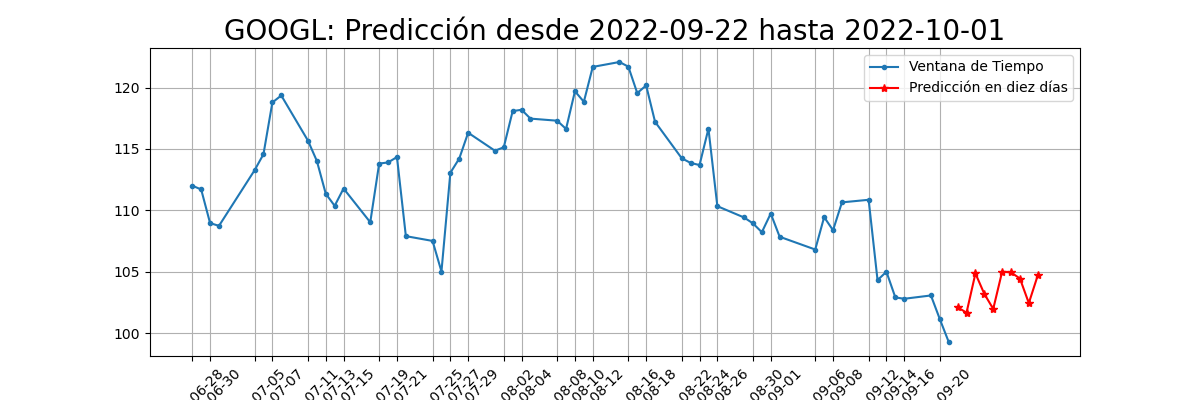

In [92]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(data_close.index[-past_history:], ultima_ventana_or, marker='.', label="Ventana de Tiempo")
plt.plot(diez_dias, prediction_or, marker='*', label="Predicción en diez días", color='r')

plt.xlabel('Tiempo')
plt.title(f"{stock}: Predicción desde {diez_dias[0].date()} hasta {diez_dias[-1].date()}", size = 20)
plt.xticks(data_close.index[-past_history:][::2], rotation=45)
plt.legend()
plt.grid()
plt.show();

In [91]:
print(prediction_or)

[102.09986  101.67049  104.86071  103.19668  101.97248  105.003456
 104.9456   104.44987  102.44771  104.696144]


In [94]:
data_close[-3:]

,Close
Date,
2022-09-19,103.070000
2022-09-20,101.139999
2022-09-21,99.279999
